# Fintech Company Loan Dataset

Upload csv files in the upload section of google colab or change the files path to your directory.

### import libraries

In [ ]:
import pandas as pd
import numpy as np
import sklearn 

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
import seaborn as sns
plt.style.use('fivethirtyeight')

### Loading data and Understanding the data

In [74]:
pwd

'/content'

In [ ]:
assignment_data = pd.read_csv("/content/assignment.csv")

In [76]:
assignment_data

,UID,Good_Bad,CUSTOMER_PROFILE_CODE,LOCATIONNAME,VEHICLEMODEL,ASSETCOST,LOANAMOUNT,EMI,TENURE,ADDRESSCONFIRMED,DESIGNATION,RESIDENCETYPE,NOOFYEARSINSAMECITY,RESIDENCESTABILITY,RESIDENCELOCALITY,BUSINESSCATEGORY,BUSINESSMARGINGROSS,INCOMEEMPLOYMENT,STABILITYINBUSINESS,STABILITYCONFIRMED,STABILTIYCONFIRMEDTHRU,ISFAMILYINVOLVED,OFFICETYPE,MONTHLYTURNOVER,STOCKVALUEINHAND,BUSINESSMARGINNET,NOOFEMPLOYEES,NAMEBOARDSEEN,OFFICELOCALITY,ISRESIDENCECOMEOFFICE,ENDUSEOFLOAN,ENDUSEOFASSET,ASSETLOCATION,NEIGHBOURREF,POLITICALLINK,PROFESSIONTYPE,CURRENTBUSINESSSTABILITY,APPLICANTDESIGNATION,ASSETREGMONTH,ASSETREGYEAR,LANDOWNERSHIP,IRRIGATIONSOURCE,CROPSCULTIVATED,DISTFROMSCELOCATION,DISTFROMDEALERLOCATION,IMGCONFIRM,TOTALEXPENSEPERMONTH,NETINCOMEPERMONTH,FOIR
0,1,Bad,PROF270,MADURAI,HONDA CITY 1.5 GXI PETROL 2008,900000.0,350000.0,13369.0,36.0,Y,APPLICANT,R,20.0,4.0,3.0,PR005,0.0,80000.0,15.0,N,5.0,Y,O,0.0,0.0,0,50,N,2,N,WON USE,1.0,MADURAI,POSITIVE,N,SEP,2.0,PROPREITOR,NaN,0.0,NaN,NaN,NaN,0.0,0.0,Y,0.0,80000.0,17
1,2,Good,PROF218,KOLKATA,MARUTI SUZUKI EECO 7 STR PETROL 2011,400000.0,125250.0,5428.0,30.0,Y,SELF,O,45.0,45.0,3.0,PR005,0.0,35000.0,20.0,N,6.0,Y,O,0.0,0.0,0,1,Y,1,Y,NOT,1.0,BANGAON,POSITIVE,N,SEP,15.0,PROP,NaN,0.0,NaN,NaN,NaN,0.0,0.0,Y,8000.0,27000.0,20
2,3,Good,PROF305,NAGPUR,MARUTI SUZUKI SWIFT VDI DIESEL 2013,450000.0,329250.0,8536.0,60.0,Y,ELDER BROTHER,O,15.0,15.0,3.0,PR005,0.0,50000.0,3.0,Y,5.0,N,R,50000.0,0.0,0,1,Y,2,N,PERSONAL,1.0,NAGPUR,POSITIVE,N,SEP,3.0,PROPRIETOR,NaN,0.0,NaN,NaN,NaN,0.0,0.0,Y,0.0,50000.0,17
3,4,Good,PROF356,AHMEDABAD,FORD ENDEAVOUR XLT 4X2 DIESEL 2008,600000.0,300000.0,11084.0,36.0,Y,PROPRIETOR,O,35.0,30.0,3.0,PR005,25.0,60000.0,20.0,N,NaN,N,O,300000.0,500000.0,20,4,Y,2,N,VEHICLE PURCHASSE,1.0,AHMEDABAD,POSITIVE,N,SEP,20.0,PROPRIETOR,NaN,0.0,NaN,NaN,NaN,0.0,0.0,Y,0.0,60000.0,18
4,5,Bad,PROF300,NAGPUR,MARUTI SUZUKI SWIFT DZIRE VDI BS IV DIESEL 2013,550000.0,429250.0,15898.0,36.0,Y,SELF,O,25.0,25.0,3.0,PR005,0.0,40000.0,15.0,N,NaN,N,R,0.0,0.0,0,1,Y,2,N,NAA,1.0,NaN,POSITIVE,N,SEP,15.0,SELF EMPLOYED,NaN,0.0,NaN,NaN,NaN,0.0,0.0,Y,10000.0,30000.0,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,Bad,PROF245,BIKANER,MAHINDRA XUV500 W4 DIESEL 2014,750000.0,700000.0,18084.0,60.0,Y,SELF,O,20.0,20.0,3.0,PR005,0.0,70000.0,7.0,N,5.0,N,R,0.0,0.0,0,1,Y,2,N,PURCHASE THE VEHICLE,1.0,BIKANER,POSITIVE,N,SEP,7.0,PROPREITOR,NaN,0.0,NaN,NaN,NaN,0.0,0.0,Y,22844.0,47156.0,50
9996,9997,Bad,PROF096,VISAKHAPATNAM,NISSAN SUNNY XV DIESEL 2012,500000.0,404250.0,16283.0,36.0,Y,SELF,O,20.0,15.0,3.0,PR005,0.0,100000.0,12.0,Y,5.0,Y,O,0.0,0.0,0,3,Y,2,Y,ASSET TO BE USED BY APPLICANT,1.0,VIZAG,POSITIVE,N,SEP,10.0,PROPRIETOR,NaN,0.0,NaN,NaN,NaN,0.0,0.0,Y,30000.0,70000.0,23
9997,9998,Good,PROF358,ORISSA,MARUTI SUZUKI ALTO LXI PETROL 2010,300000.0,154250.0,4435.0,48.0,Y,PROJECT MANAGER,R,17.0,17.0,3.0,PR005,16.0,45000.0,3.0,Y,5.0,Y,R,200000.0,100000.0,11,4,Y,1,Y,GIVEN TO SALLER,1.0,BHUBANESWER,POSITIVE,N,SEP,3.0,PROPERATOR,NaN,0.0,NaN,NaN,NaN,0.0,0.0,Y,25000.0,20000.0,22
9998,9999,Bad,PROF372,SALEM,MAHINDRA XUV500 W8 DIESEL 2012,1400000.0,808500.0,23413.0,48.0,Y,APPLICANT,O,50.0,20.0,3.0,PR006,0.0,600000.0,30.0,Y,1.0,Y,O,0.0,0.0,0,17,Y,2,N,APPLICANT,1.0,UTHANGARAI,POSITIVE,N,SEP,1.5,CORRESPONDENT,NaN,0.0,NaN,NaN,NaN,0.0,0.0,Y,385000.0,215000.0,15


In [ ]:
assignment_data_dictionary = pd.read_csv("/content/assignment_data_dictionary.csv")

In [78]:
 assignment_data_dictionary

,Data Field,Description
0,UID,Unique customer ID
1,CUSTOMER_PROFILE_CODE,Profile of customers
2,Good_Bad,Customer turned Bad or Good
3,LOCATIONNAME,Location name
4,VEHICLEMODEL,Vehicle Model
5,ASSETCOST,Asset cost
6,LOANAMOUNT,Loan Amount
7,EMI,EMI
8,TENURE,Tenure
9,ADDRESSCONFIRMED,Address confirmed


### data wrangling

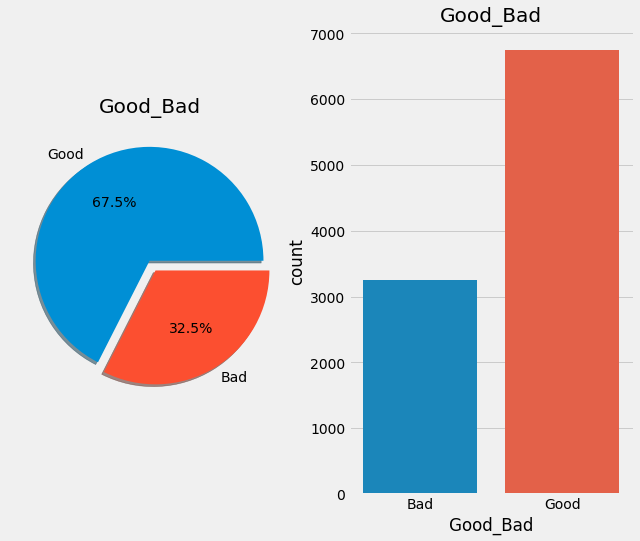

In [79]:
# 0 for Bad , 1 for Good
f,ax=plt.subplots(1,2,figsize=(10,8))
assignment_data['Good_Bad'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Good_Bad')
ax[0].set_ylabel('')
sns.countplot('Good_Bad',data=assignment_data,ax=ax[1])
ax[1].set_title('Good_Bad')
plt.show()

In [80]:
assignment_data.columns

Index(['UID', 'Good_Bad', 'CUSTOMER_PROFILE_CODE', 'LOCATIONNAME',
       'VEHICLEMODEL', 'ASSETCOST', 'LOANAMOUNT', 'EMI', 'TENURE',
       'ADDRESSCONFIRMED', 'DESIGNATION', 'RESIDENCETYPE',
       'NOOFYEARSINSAMECITY', 'RESIDENCESTABILITY', 'RESIDENCELOCALITY',
       'BUSINESSCATEGORY', 'BUSINESSMARGINGROSS', 'INCOMEEMPLOYMENT',
       'STABILITYINBUSINESS', 'STABILITYCONFIRMED', 'STABILTIYCONFIRMEDTHRU',
       'ISFAMILYINVOLVED', 'OFFICETYPE', 'MONTHLYTURNOVER', 'STOCKVALUEINHAND',
       'BUSINESSMARGINNET', 'NOOFEMPLOYEES', 'NAMEBOARDSEEN', 'OFFICELOCALITY',
       'ISRESIDENCECOMEOFFICE', 'ENDUSEOFLOAN', 'ENDUSEOFASSET',
       'ASSETLOCATION', 'NEIGHBOURREF', 'POLITICALLINK', 'PROFESSIONTYPE',
       'CURRENTBUSINESSSTABILITY', 'APPLICANTDESIGNATION', 'ASSETREGMONTH',
       'ASSETREGYEAR', 'LANDOWNERSHIP', 'IRRIGATIONSOURCE', 'CROPSCULTIVATED',
       'DISTFROMSCELOCATION', 'DISTFROMDEALERLOCATION', 'IMGCONFIRM',
       'TOTALEXPENSEPERMONTH', 'NETINCOMEPERMONTH', 'FOIR'],


In [81]:
assignment_data['ASSETCOST'].max()

7200000.0

In [82]:
assignment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 49 columns):
UID                         10000 non-null int64
Good_Bad                    10000 non-null object
CUSTOMER_PROFILE_CODE       10000 non-null object
LOCATIONNAME                9872 non-null object
VEHICLEMODEL                9853 non-null object
ASSETCOST                   9855 non-null float64
LOANAMOUNT                  9855 non-null float64
EMI                         9855 non-null float64
TENURE                      9855 non-null float64
ADDRESSCONFIRMED            9855 non-null object
DESIGNATION                 9780 non-null object
RESIDENCETYPE               9758 non-null object
NOOFYEARSINSAMECITY         9758 non-null float64
RESIDENCESTABILITY          9781 non-null float64
RESIDENCELOCALITY           9778 non-null float64
BUSINESSCATEGORY            9777 non-null object
BUSINESSMARGINGROSS         9881 non-null float64
INCOMEEMPLOYMENT            9852 non-null float64

In [83]:
assignment_data.describe()
#2.3e-5, means 2.3 times ten to the minus five power, or 0.000023

,UID,ASSETCOST,LOANAMOUNT,EMI,TENURE,NOOFYEARSINSAMECITY,RESIDENCESTABILITY,RESIDENCELOCALITY,BUSINESSMARGINGROSS,INCOMEEMPLOYMENT,STABILITYINBUSINESS,STABILTIYCONFIRMEDTHRU,MONTHLYTURNOVER,STOCKVALUEINHAND,ENDUSEOFASSET,CURRENTBUSINESSSTABILITY,ASSETREGMONTH,ASSETREGYEAR,LANDOWNERSHIP,IRRIGATIONSOURCE,CROPSCULTIVATED,DISTFROMSCELOCATION,DISTFROMDEALERLOCATION,TOTALEXPENSEPERMONTH,NETINCOMEPERMONTH
count,10000.00000,9.855000e+03,9.855000e+03,9855.000000,9855.000000,9758.000000,9781.000000,9778.000000,9881.000000,9.852000e+03,9888.000000,8200.000000,9.891000e+03,9.891000e+03,9742.000000,9815.000000,0.0,9786.0,0.0,0.0,0.0,9786.0,9786.0,9.151000e+03,9.151000e+03
mean,5000.50000,5.287254e+05,3.870046e+05,12234.161542,45.119432,26.650618,78.625360,3.053385,8.111831,1.600213e+05,14.963028,4.351707,2.202182e+05,1.496333e+05,1.083297,18.101189,NaN,0.0,NaN,NaN,NaN,0.0,0.0,2.829575e+04,7.112327e+04
std,2886.89568,3.183957e+05,2.386860e+05,6718.607922,12.179016,14.088494,4424.230301,0.515896,20.962192,5.049913e+06,301.708315,1.645407,3.388825e+06,2.777251e+06,1.386184,706.511723,NaN,0.0,NaN,NaN,NaN,0.0,0.0,1.230618e+05,2.968032e+05
min,1.00000,0.000000e+00,5.000000e+04,1402.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.000000e+00,-2.200000e+05
25%,2500.75000,3.000000e+05,2.241250e+05,7750.000000,36.000000,20.000000,8.000000,3.000000,0.000000,4.000000e+04,5.000000,5.000000,0.000000e+00,0.000000e+00,1.000000,5.000000,NaN,0.0,NaN,NaN,NaN,0.0,0.0,2.500000e+01,2.800000e+04
50%,5000.50000,4.750000e+05,3.500000e+05,11114.000000,48.000000,25.000000,20.000000,3.000000,0.000000,5.900000e+04,10.000000,5.000000,0.000000e+00,0.000000e+00,1.000000,10.000000,NaN,0.0,NaN,NaN,NaN,0.0,0.0,1.200000e+04,4.000000e+04
75%,7500.25000,6.500000e+05,5.000000e+05,14918.000000,60.000000,35.000000,30.000000,3.000000,0.000000,1.000000e+05,15.000000,5.000000,4.000000e+04,0.000000e+00,1.000000,15.000000,NaN,0.0,NaN,NaN,NaN,0.0,0.0,2.500000e+04,6.638050e+04
max,10000.00000,7.200000e+06,3.512750e+06,103000.000000,60.000000,401.000000,411014.000000,6.000000,100.000000,5.000000e+08,30000.000000,6.000000,2.100000e+08,2.500000e+08,78.527960,70000.000000,NaN,0.0,NaN,NaN,NaN,0.0,0.0,8.267919e+06,1.800000e+07


### Data Cleaning

In [84]:
assignment_data.isnull().sum()

UID                             0
Good_Bad                        0
CUSTOMER_PROFILE_CODE           0
LOCATIONNAME                  128
VEHICLEMODEL                  147
ASSETCOST                     145
LOANAMOUNT                    145
EMI                           145
TENURE                        145
ADDRESSCONFIRMED              145
DESIGNATION                   220
RESIDENCETYPE                 242
NOOFYEARSINSAMECITY           242
RESIDENCESTABILITY            219
RESIDENCELOCALITY             222
BUSINESSCATEGORY              223
BUSINESSMARGINGROSS           119
INCOMEEMPLOYMENT              148
STABILITYINBUSINESS           112
STABILITYCONFIRMED            107
STABILTIYCONFIRMEDTHRU       1800
ISFAMILYINVOLVED              110
OFFICETYPE                    224
MONTHLYTURNOVER               109
STOCKVALUEINHAND              109
BUSINESSMARGINNET             113
NOOFEMPLOYEES                 126
NAMEBOARDSEEN                 126
OFFICELOCALITY                242
ISRESIDENCECOM

These columns are empty so we will remove them from data.  
1.ASSETREGMONTH  
2.LANDOWNERSHIP  
3.IRRIGATIONSOURCE  
4.CROPSCULTIVATED  

In [ ]:
assignment_data=  assignment_data.drop(["ASSETREGMONTH", 'LANDOWNERSHIP','IRRIGATIONSOURCE','CROPSCULTIVATED'], axis = 1) 

The features like these are either zero or null.  
DISTFROMSCELOCATION : Distance from SCE location  
ASSETREGYEAR : Asset registration year   
DISTFROMDEALERLOCATION : Distance from dealer location  
So, they are of no use for us

In [86]:
assignment_data.ASSETREGYEAR.unique()

array([ 0., nan])

In [87]:
assignment_data.DISTFROMSCELOCATION.unique()

array([ 0., nan])

In [88]:
assignment_data.DISTFROMDEALERLOCATION.unique()

array([ 0., nan])

In [ ]:
assignment_data=  assignment_data.drop(["ASSETREGYEAR","DISTFROMSCELOCATION","DISTFROMDEALERLOCATION"], axis =1)

In [90]:
assignment_data.corr(method ='pearson') 

,UID,ASSETCOST,LOANAMOUNT,EMI,TENURE,NOOFYEARSINSAMECITY,RESIDENCESTABILITY,RESIDENCELOCALITY,BUSINESSMARGINGROSS,INCOMEEMPLOYMENT,STABILITYINBUSINESS,STABILTIYCONFIRMEDTHRU,MONTHLYTURNOVER,STOCKVALUEINHAND,ENDUSEOFASSET,CURRENTBUSINESSSTABILITY,TOTALEXPENSEPERMONTH,NETINCOMEPERMONTH
UID,1.000000,-0.019508,-0.025937,-0.033830,0.012309,0.003943,0.018303,-0.000419,0.000748,0.013949,0.015808,0.018559,0.001333,0.011468,-0.001572,-0.012158,-0.008444,-0.008558
ASSETCOST,-0.019508,1.000000,0.878719,0.821596,0.363249,0.006747,-0.014416,0.018461,0.024551,0.027240,-0.009265,-0.121322,0.116066,0.075593,0.031194,0.015355,0.157830,0.186999
LOANAMOUNT,-0.025937,0.878719,1.000000,0.925845,0.440567,-0.015114,-0.015714,0.011410,-0.008313,0.024127,-0.007577,-0.154439,0.115690,0.076633,0.033634,-0.003110,0.193687,0.201115
EMI,-0.033830,0.821596,0.925845,1.000000,0.137727,-0.005730,-0.013796,0.011348,-0.000292,0.024935,-0.006915,-0.143508,0.117633,0.070570,0.031219,-0.000010,0.204370,0.196615
TENURE,0.012309,0.363249,0.440567,0.137727,1.000000,-0.017940,-0.023118,0.002596,-0.027621,0.006948,-0.007886,-0.060738,0.024734,0.029228,0.007719,-0.007679,0.043559,0.057425
NOOFYEARSINSAMECITY,0.003943,0.006747,-0.015114,-0.005730,-0.017940,1.000000,-0.015110,0.010985,0.063762,-0.003351,0.012031,0.044889,-0.004807,0.006802,0.019664,-0.004561,0.029745,0.011186
RESIDENCESTABILITY,0.018303,-0.014416,-0.015714,-0.013796,-0.023118,-0.015110,1.000000,-0.001266,0.003334,-0.000321,-0.000513,-0.019847,-0.000690,-0.000735,-0.002889,-0.000299,-0.002919,-0.000901
RESIDENCELOCALITY,-0.000419,0.018461,0.011410,0.011348,0.002596,0.010985,-0.001266,1.000000,0.021336,-0.000404,0.000252,0.030615,0.003559,0.003030,0.007815,-0.000963,0.007768,0.006781
BUSINESSMARGINGROSS,0.000748,0.024551,-0.008313,-0.000292,-0.027621,0.063762,0.003334,0.021336,1.000000,-0.003498,-0.003135,0.019118,0.041953,0.049041,0.001702,-0.003599,0.020658,-0.004834
INCOMEEMPLOYMENT,0.013949,0.027240,0.024127,0.024935,0.006948,-0.003351,-0.000321,-0.000404,-0.003498,1.000000,0.000129,-0.027084,0.010834,0.003533,0.145862,-0.000060,0.636030,0.947433


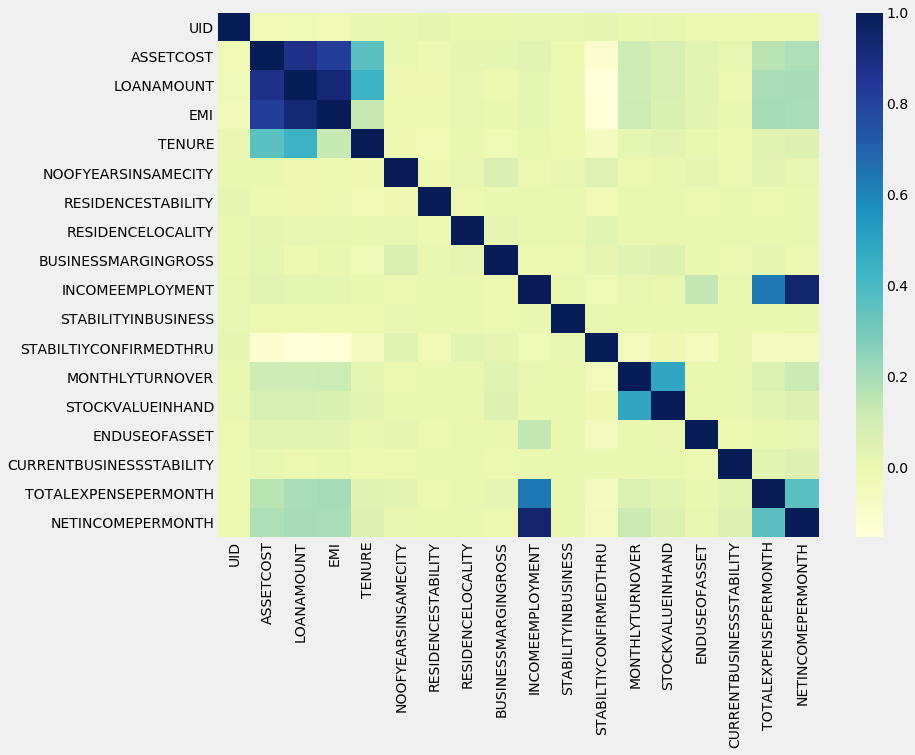

In [91]:
corr = assignment_data.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr,cmap="YlGnBu")

### Outliers and data visualisation

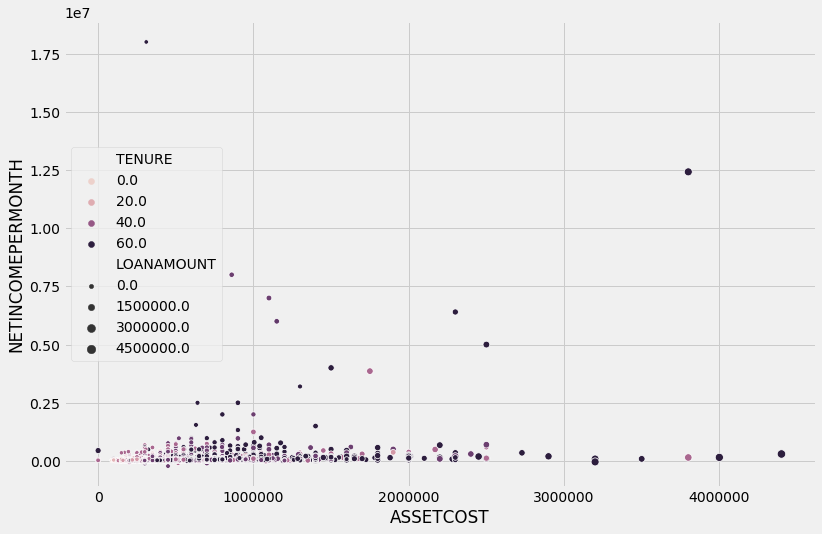

In [92]:
fig,axes=plt.subplots(1,1,figsize=(12,8))
sns.scatterplot(x='ASSETCOST',y='NETINCOMEPERMONTH',hue='TENURE',size='LOANAMOUNT',data=assignment_data)

In [93]:
assignment_data.columns

Index(['UID', 'Good_Bad', 'CUSTOMER_PROFILE_CODE', 'LOCATIONNAME',
       'VEHICLEMODEL', 'ASSETCOST', 'LOANAMOUNT', 'EMI', 'TENURE',
       'ADDRESSCONFIRMED', 'DESIGNATION', 'RESIDENCETYPE',
       'NOOFYEARSINSAMECITY', 'RESIDENCESTABILITY', 'RESIDENCELOCALITY',
       'BUSINESSCATEGORY', 'BUSINESSMARGINGROSS', 'INCOMEEMPLOYMENT',
       'STABILITYINBUSINESS', 'STABILITYCONFIRMED', 'STABILTIYCONFIRMEDTHRU',
       'ISFAMILYINVOLVED', 'OFFICETYPE', 'MONTHLYTURNOVER', 'STOCKVALUEINHAND',
       'BUSINESSMARGINNET', 'NOOFEMPLOYEES', 'NAMEBOARDSEEN', 'OFFICELOCALITY',
       'ISRESIDENCECOMEOFFICE', 'ENDUSEOFLOAN', 'ENDUSEOFASSET',
       'ASSETLOCATION', 'NEIGHBOURREF', 'POLITICALLINK', 'PROFESSIONTYPE',
       'CURRENTBUSINESSSTABILITY', 'APPLICANTDESIGNATION', 'IMGCONFIRM',
       'TOTALEXPENSEPERMONTH', 'NETINCOMEPERMONTH', 'FOIR'],
      dtype='object')

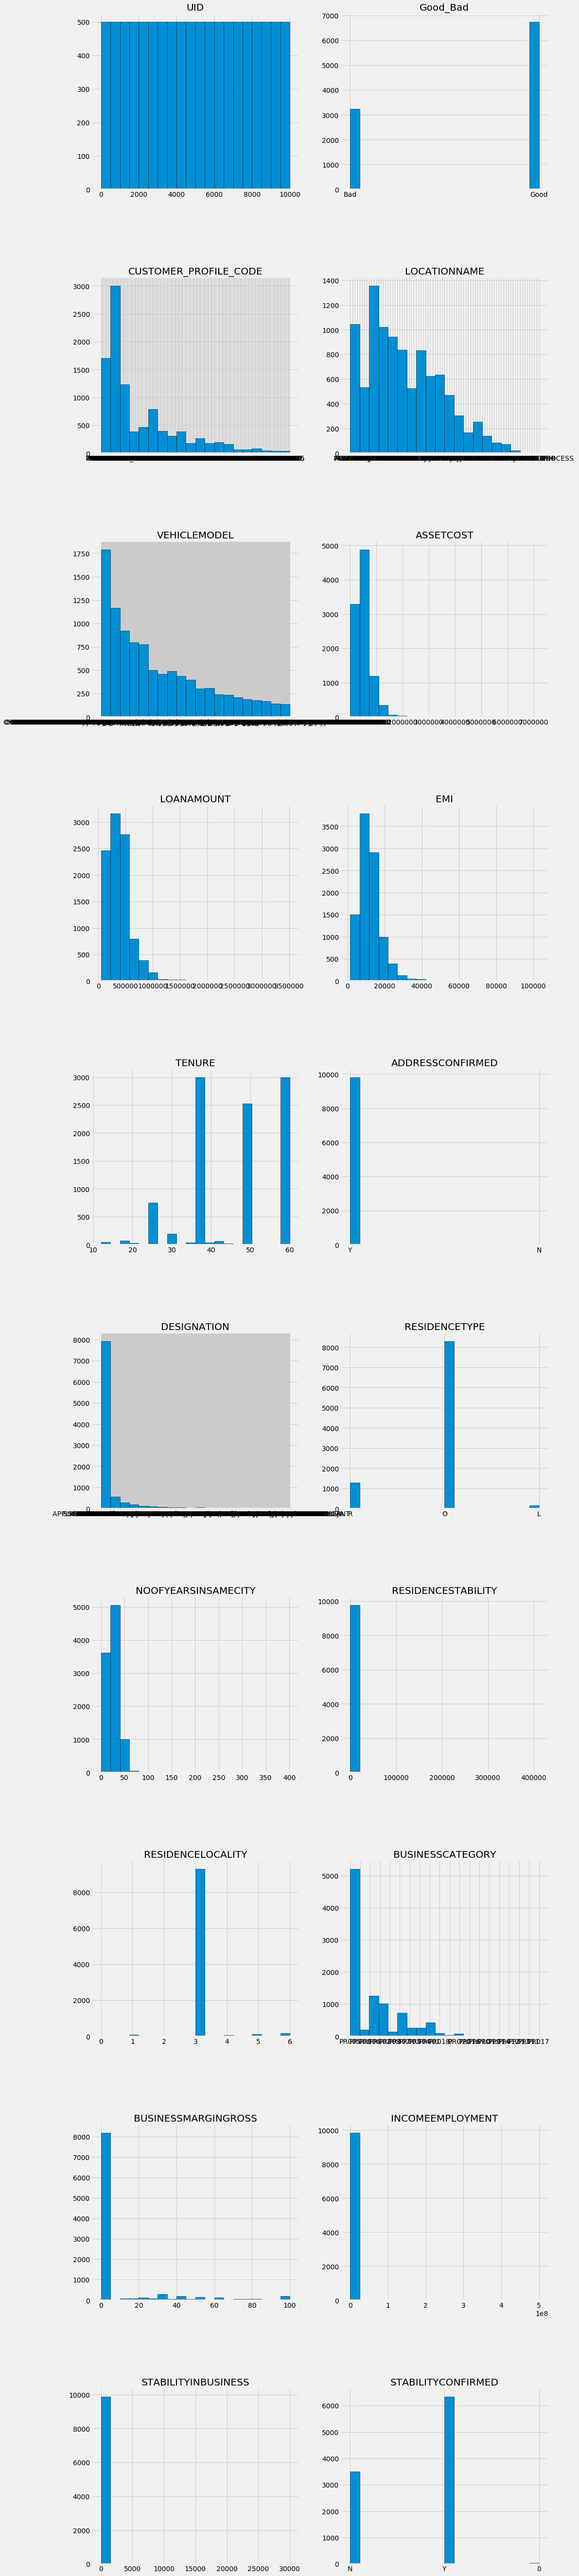

In [94]:
# change the value of column to find plot map 
columns=assignment_data.columns[:20]
plt.subplots(figsize=(15,90))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),2,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    assignment_data[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

In [95]:
assignment_data.describe()

,UID,ASSETCOST,LOANAMOUNT,EMI,TENURE,NOOFYEARSINSAMECITY,RESIDENCESTABILITY,RESIDENCELOCALITY,BUSINESSMARGINGROSS,INCOMEEMPLOYMENT,STABILITYINBUSINESS,STABILTIYCONFIRMEDTHRU,MONTHLYTURNOVER,STOCKVALUEINHAND,ENDUSEOFASSET,CURRENTBUSINESSSTABILITY,TOTALEXPENSEPERMONTH,NETINCOMEPERMONTH
count,10000.00000,9.855000e+03,9.855000e+03,9855.000000,9855.000000,9758.000000,9781.000000,9778.000000,9881.000000,9.852000e+03,9888.000000,8200.000000,9.891000e+03,9.891000e+03,9742.000000,9815.000000,9.151000e+03,9.151000e+03
mean,5000.50000,5.287254e+05,3.870046e+05,12234.161542,45.119432,26.650618,78.625360,3.053385,8.111831,1.600213e+05,14.963028,4.351707,2.202182e+05,1.496333e+05,1.083297,18.101189,2.829575e+04,7.112327e+04
std,2886.89568,3.183957e+05,2.386860e+05,6718.607922,12.179016,14.088494,4424.230301,0.515896,20.962192,5.049913e+06,301.708315,1.645407,3.388825e+06,2.777251e+06,1.386184,706.511723,1.230618e+05,2.968032e+05
min,1.00000,0.000000e+00,5.000000e+04,1402.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000e+00,-2.200000e+05
25%,2500.75000,3.000000e+05,2.241250e+05,7750.000000,36.000000,20.000000,8.000000,3.000000,0.000000,4.000000e+04,5.000000,5.000000,0.000000e+00,0.000000e+00,1.000000,5.000000,2.500000e+01,2.800000e+04
50%,5000.50000,4.750000e+05,3.500000e+05,11114.000000,48.000000,25.000000,20.000000,3.000000,0.000000,5.900000e+04,10.000000,5.000000,0.000000e+00,0.000000e+00,1.000000,10.000000,1.200000e+04,4.000000e+04
75%,7500.25000,6.500000e+05,5.000000e+05,14918.000000,60.000000,35.000000,30.000000,3.000000,0.000000,1.000000e+05,15.000000,5.000000,4.000000e+04,0.000000e+00,1.000000,15.000000,2.500000e+04,6.638050e+04
max,10000.00000,7.200000e+06,3.512750e+06,103000.000000,60.000000,401.000000,411014.000000,6.000000,100.000000,5.000000e+08,30000.000000,6.000000,2.100000e+08,2.500000e+08,78.527960,70000.000000,8.267919e+06,1.800000e+07


In [96]:
assignment_data.head()

,UID,Good_Bad,CUSTOMER_PROFILE_CODE,LOCATIONNAME,VEHICLEMODEL,ASSETCOST,LOANAMOUNT,EMI,TENURE,ADDRESSCONFIRMED,DESIGNATION,RESIDENCETYPE,NOOFYEARSINSAMECITY,RESIDENCESTABILITY,RESIDENCELOCALITY,BUSINESSCATEGORY,BUSINESSMARGINGROSS,INCOMEEMPLOYMENT,STABILITYINBUSINESS,STABILITYCONFIRMED,STABILTIYCONFIRMEDTHRU,ISFAMILYINVOLVED,OFFICETYPE,MONTHLYTURNOVER,STOCKVALUEINHAND,BUSINESSMARGINNET,NOOFEMPLOYEES,NAMEBOARDSEEN,OFFICELOCALITY,ISRESIDENCECOMEOFFICE,ENDUSEOFLOAN,ENDUSEOFASSET,ASSETLOCATION,NEIGHBOURREF,POLITICALLINK,PROFESSIONTYPE,CURRENTBUSINESSSTABILITY,APPLICANTDESIGNATION,IMGCONFIRM,TOTALEXPENSEPERMONTH,NETINCOMEPERMONTH,FOIR
0,1,Bad,PROF270,MADURAI,HONDA CITY 1.5 GXI PETROL 2008,900000.0,350000.0,13369.0,36.0,Y,APPLICANT,R,20.0,4.0,3.0,PR005,0.0,80000.0,15.0,N,5.0,Y,O,0.0,0.0,0,50,N,2,N,WON USE,1.0,MADURAI,POSITIVE,N,SEP,2.0,PROPREITOR,Y,0.0,80000.0,17
1,2,Good,PROF218,KOLKATA,MARUTI SUZUKI EECO 7 STR PETROL 2011,400000.0,125250.0,5428.0,30.0,Y,SELF,O,45.0,45.0,3.0,PR005,0.0,35000.0,20.0,N,6.0,Y,O,0.0,0.0,0,1,Y,1,Y,NOT,1.0,BANGAON,POSITIVE,N,SEP,15.0,PROP,Y,8000.0,27000.0,20
2,3,Good,PROF305,NAGPUR,MARUTI SUZUKI SWIFT VDI DIESEL 2013,450000.0,329250.0,8536.0,60.0,Y,ELDER BROTHER,O,15.0,15.0,3.0,PR005,0.0,50000.0,3.0,Y,5.0,N,R,50000.0,0.0,0,1,Y,2,N,PERSONAL,1.0,NAGPUR,POSITIVE,N,SEP,3.0,PROPRIETOR,Y,0.0,50000.0,17
3,4,Good,PROF356,AHMEDABAD,FORD ENDEAVOUR XLT 4X2 DIESEL 2008,600000.0,300000.0,11084.0,36.0,Y,PROPRIETOR,O,35.0,30.0,3.0,PR005,25.0,60000.0,20.0,N,NaN,N,O,300000.0,500000.0,20,4,Y,2,N,VEHICLE PURCHASSE,1.0,AHMEDABAD,POSITIVE,N,SEP,20.0,PROPRIETOR,Y,0.0,60000.0,18
4,5,Bad,PROF300,NAGPUR,MARUTI SUZUKI SWIFT DZIRE VDI BS IV DIESEL 2013,550000.0,429250.0,15898.0,36.0,Y,SELF,O,25.0,25.0,3.0,PR005,0.0,40000.0,15.0,N,NaN,N,R,0.0,0.0,0,1,Y,2,N,NAA,1.0,NaN,POSITIVE,N,SEP,15.0,SELF EMPLOYED,Y,10000.0,30000.0,53


### Null values description

In [ ]:
#assignment_data.loc[(assignment_data.IMGCONFIRM.isnull())]

In [98]:
pd.options.display.max_rows = 25
pd.set_option('display.max_columns', 5400)
assignment_data.loc[(assignment_data.STABILTIYCONFIRMEDTHRU.isnull())]

,UID,Good_Bad,CUSTOMER_PROFILE_CODE,LOCATIONNAME,VEHICLEMODEL,ASSETCOST,LOANAMOUNT,EMI,TENURE,ADDRESSCONFIRMED,DESIGNATION,RESIDENCETYPE,NOOFYEARSINSAMECITY,RESIDENCESTABILITY,RESIDENCELOCALITY,BUSINESSCATEGORY,BUSINESSMARGINGROSS,INCOMEEMPLOYMENT,STABILITYINBUSINESS,STABILITYCONFIRMED,STABILTIYCONFIRMEDTHRU,ISFAMILYINVOLVED,OFFICETYPE,MONTHLYTURNOVER,STOCKVALUEINHAND,BUSINESSMARGINNET,NOOFEMPLOYEES,NAMEBOARDSEEN,OFFICELOCALITY,ISRESIDENCECOMEOFFICE,ENDUSEOFLOAN,ENDUSEOFASSET,ASSETLOCATION,NEIGHBOURREF,POLITICALLINK,PROFESSIONTYPE,CURRENTBUSINESSSTABILITY,APPLICANTDESIGNATION,IMGCONFIRM,TOTALEXPENSEPERMONTH,NETINCOMEPERMONTH,FOIR
3,4,Good,PROF356,AHMEDABAD,FORD ENDEAVOUR XLT 4X2 DIESEL 2008,600000.0,300000.0,11084.0,36.0,Y,PROPRIETOR,O,35.0,30.0,3.0,PR005,25.0,60000.0,20.0,N,NaN,N,O,300000.0,500000.0,20,4,Y,2,N,VEHICLE PURCHASSE,1.0,AHMEDABAD,POSITIVE,N,SEP,20.0,PROPRIETOR,Y,0.0,60000.0,18
4,5,Bad,PROF300,NAGPUR,MARUTI SUZUKI SWIFT DZIRE VDI BS IV DIESEL 2013,550000.0,429250.0,15898.0,36.0,Y,SELF,O,25.0,25.0,3.0,PR005,0.0,40000.0,15.0,N,NaN,N,R,0.0,0.0,0,1,Y,2,N,NAA,1.0,NaN,POSITIVE,N,SEP,15.0,SELF EMPLOYED,Y,10000.0,30000.0,53
5,6,Good,PROF310,PONDICHERRY,MARUTI SUZUKI SWIFT DZIRE VDI BS IV DIESEL 2014,640823.0,504250.0,18336.0,36.0,Y,APPLICANT,O,37.0,37.0,3.0,PR005,0.0,145000.0,12.0,N,NaN,N,R,0.0,0.0,0,2,Y,2,N,VEHICLE PURCHASE,1.0,NaN,POSITIVE,N,SEP,12.0,PROPREITOR,Y,60000.0,85000.0,22
11,12,Bad,PROF063,COIMBATORE,TOYOTA ETIOS GD DIESEL 2011,700000.0,354250.0,11159.0,48.0,Y,APPLICANT,R,15.0,4.0,3.0,PR006,0.0,50000.0,15.0,N,NaN,N,R,0.0,0.0,0,15,Y,1,Y,SALE-PURCHASE TOYOTA ETIOS,1.0,COIMBATORE,POSITIVE,N,SEP,8.0,PROPRIETOR,Y,25959.0,24041.0,65
28,29,Bad,PROF284,MADURAI,CHEVROLET TAVERA B1 10 STR BS III DIESEL 2011,500000.0,404250.0,12633.0,48.0,Y,APPLICANT,O,30.0,30.0,3.0,PR005,0.0,160000.0,10.0,N,NaN,Y,O,0.0,0.0,0,1,Y,2,N,APPLICANT,1.0,DEVIPATTINAM,POSITIVE,N,SEP,10.0,PROPRIETOR,Y,30000.0,130000.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9965,9966,Good,PROF096,COIMBATORE,TOYOTA INNOVA 2.5 V 7STR DIESEL 2010,600000.0,504250.0,13926.0,60.0,Y,APPLICANT,R,20.0,4.0,3.0,PR005,0.0,90000.0,15.0,N,NaN,N,R,0.0,0.0,0,6,N,2,N,RE FINANCE TOYOTA INNOVA,1.0,COIMBATORE,POSITIVE,N,SEP,2.0,PROPRIETOR,Y,25000.0,65000.0,21
9969,9970,Good,PROF252,AHMEDABAD,TOYOTA FORTUNER 3.0 MT 4X2 DIESEL 2009,900000.0,800000.0,29556.0,36.0,Y,SELF APPLICANT AND COAPPLICANT,O,50.0,50.0,3.0,PR007,25.0,1500000.0,50.0,N,NaN,N,O,120000.0,0.0,10,0,N,1,Y,TO PURCHASE PROPOSED ASSET,1.0,KHEDBRAHMA,POSITIVE,N,AGR,50.0,AGRICULTURIST,Y,NaN,NaN,NA
9974,9975,Good,PROF292,PONDICHERRY,VOLKSWAGEN VENTO HIGHLINE DIESEL 2011,600000.0,404250.0,11960.0,48.0,Y,APPLICANT,O,15.0,10.0,3.0,PR005,0.0,50000.0,13.0,N,NaN,N,R,0.0,0.0,0,2,Y,2,N,VEHICLE PURCHASE,1.0,THIRUVANNAMALAI,POSITIVE,N,SEP,13.0,PROPREITOR,Y,20000.0,30000.0,40
9982,9983,Good,PROF109,COIMBATORE,MAHINDRA BOLERO DI DIESEL 2012,700000.0,404250.0,10949.0,60.0,Y,APPL,R,20.0,3.0,3.0,PR005,0.0,75000.0,8.0,N,NaN,N,R,0.0,0.0,0,8,N,2,N,SALE PURCHASE MAHINDRA BOLERO,1.0,COIMBATORE,POSITIVE,N,SEP,12.0,PROP,Y,15000.0,60000.0,18


In [ ]:
#sns.catplot(x="VEHICLEMODEL", y="ASSETCOST", kind="bar", data=assignment_data);

In [ ]:
#sns.catplot(x="VEHICLEMODEL", kind="count", palette="ch:.25", data=assignment_data);

In [ ]:
#pd.crosstab(assignment_data.VEHICLEMODEL,assignment_data.ASSETCOST).T.style.background_gradient(cmap='summer_r')

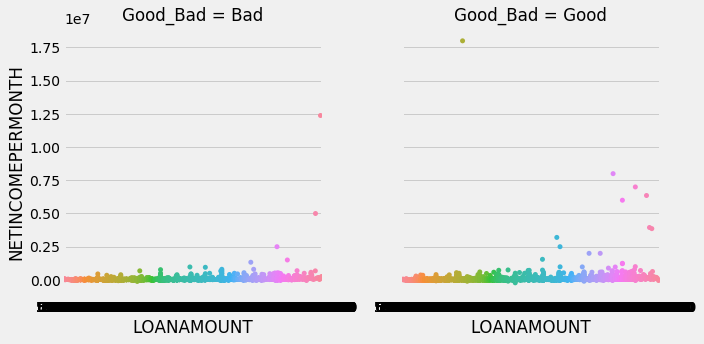

In [102]:
sns.catplot('LOANAMOUNT','NETINCOMEPERMONTH',col='Good_Bad',data=assignment_data)
plt.show()

In [ ]:
#pd.crosstab([assignment_data.Good_Bad,assignment_data.LOANAMOUNT],[assignment_data.NETINCOMEPERMONTH,assignment_data.TOTALEXPENSEPERMONTH],margins=True).style.background_gradient(cmap='summer_r')

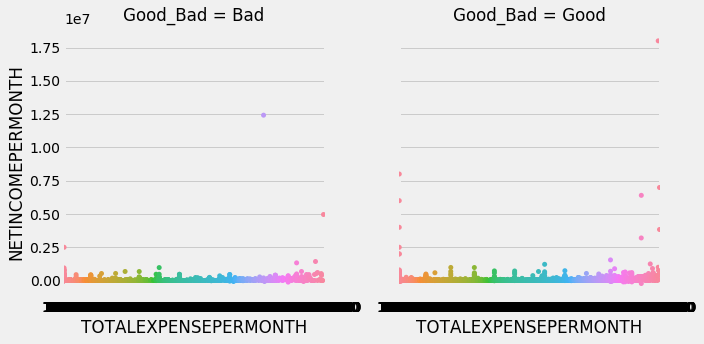

In [104]:
sns.catplot('TOTALEXPENSEPERMONTH','NETINCOMEPERMONTH',col='Good_Bad',data=assignment_data)
plt.show()

In [105]:
pd.options.display.max_rows = 100
pd.set_option('display.max_columns', 5400)
assignment_data

,UID,Good_Bad,CUSTOMER_PROFILE_CODE,LOCATIONNAME,VEHICLEMODEL,ASSETCOST,LOANAMOUNT,EMI,TENURE,ADDRESSCONFIRMED,DESIGNATION,RESIDENCETYPE,NOOFYEARSINSAMECITY,RESIDENCESTABILITY,RESIDENCELOCALITY,BUSINESSCATEGORY,BUSINESSMARGINGROSS,INCOMEEMPLOYMENT,STABILITYINBUSINESS,STABILITYCONFIRMED,STABILTIYCONFIRMEDTHRU,ISFAMILYINVOLVED,OFFICETYPE,MONTHLYTURNOVER,STOCKVALUEINHAND,BUSINESSMARGINNET,NOOFEMPLOYEES,NAMEBOARDSEEN,OFFICELOCALITY,ISRESIDENCECOMEOFFICE,ENDUSEOFLOAN,ENDUSEOFASSET,ASSETLOCATION,NEIGHBOURREF,POLITICALLINK,PROFESSIONTYPE,CURRENTBUSINESSSTABILITY,APPLICANTDESIGNATION,IMGCONFIRM,TOTALEXPENSEPERMONTH,NETINCOMEPERMONTH,FOIR
0,1,Bad,PROF270,MADURAI,HONDA CITY 1.5 GXI PETROL 2008,900000.0,350000.0,13369.0,36.0,Y,APPLICANT,R,20.0,4.0,3.0,PR005,0.0,80000.0,15.0,N,5.0,Y,O,0.0,0.0,0,50,N,2,N,WON USE,1.0,MADURAI,POSITIVE,N,SEP,2.0,PROPREITOR,Y,0.0,80000.0,17
1,2,Good,PROF218,KOLKATA,MARUTI SUZUKI EECO 7 STR PETROL 2011,400000.0,125250.0,5428.0,30.0,Y,SELF,O,45.0,45.0,3.0,PR005,0.0,35000.0,20.0,N,6.0,Y,O,0.0,0.0,0,1,Y,1,Y,NOT,1.0,BANGAON,POSITIVE,N,SEP,15.0,PROP,Y,8000.0,27000.0,20
2,3,Good,PROF305,NAGPUR,MARUTI SUZUKI SWIFT VDI DIESEL 2013,450000.0,329250.0,8536.0,60.0,Y,ELDER BROTHER,O,15.0,15.0,3.0,PR005,0.0,50000.0,3.0,Y,5.0,N,R,50000.0,0.0,0,1,Y,2,N,PERSONAL,1.0,NAGPUR,POSITIVE,N,SEP,3.0,PROPRIETOR,Y,0.0,50000.0,17
3,4,Good,PROF356,AHMEDABAD,FORD ENDEAVOUR XLT 4X2 DIESEL 2008,600000.0,300000.0,11084.0,36.0,Y,PROPRIETOR,O,35.0,30.0,3.0,PR005,25.0,60000.0,20.0,N,NaN,N,O,300000.0,500000.0,20,4,Y,2,N,VEHICLE PURCHASSE,1.0,AHMEDABAD,POSITIVE,N,SEP,20.0,PROPRIETOR,Y,0.0,60000.0,18
4,5,Bad,PROF300,NAGPUR,MARUTI SUZUKI SWIFT DZIRE VDI BS IV DIESEL 2013,550000.0,429250.0,15898.0,36.0,Y,SELF,O,25.0,25.0,3.0,PR005,0.0,40000.0,15.0,N,NaN,N,R,0.0,0.0,0,1,Y,2,N,NAA,1.0,NaN,POSITIVE,N,SEP,15.0,SELF EMPLOYED,Y,10000.0,30000.0,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,Bad,PROF245,BIKANER,MAHINDRA XUV500 W4 DIESEL 2014,750000.0,700000.0,18084.0,60.0,Y,SELF,O,20.0,20.0,3.0,PR005,0.0,70000.0,7.0,N,5.0,N,R,0.0,0.0,0,1,Y,2,N,PURCHASE THE VEHICLE,1.0,BIKANER,POSITIVE,N,SEP,7.0,PROPREITOR,Y,22844.0,47156.0,50
9996,9997,Bad,PROF096,VISAKHAPATNAM,NISSAN SUNNY XV DIESEL 2012,500000.0,404250.0,16283.0,36.0,Y,SELF,O,20.0,15.0,3.0,PR005,0.0,100000.0,12.0,Y,5.0,Y,O,0.0,0.0,0,3,Y,2,Y,ASSET TO BE USED BY APPLICANT,1.0,VIZAG,POSITIVE,N,SEP,10.0,PROPRIETOR,Y,30000.0,70000.0,23
9997,9998,Good,PROF358,ORISSA,MARUTI SUZUKI ALTO LXI PETROL 2010,300000.0,154250.0,4435.0,48.0,Y,PROJECT MANAGER,R,17.0,17.0,3.0,PR005,16.0,45000.0,3.0,Y,5.0,Y,R,200000.0,100000.0,11,4,Y,1,Y,GIVEN TO SALLER,1.0,BHUBANESWER,POSITIVE,N,SEP,3.0,PROPERATOR,Y,25000.0,20000.0,22
9998,9999,Bad,PROF372,SALEM,MAHINDRA XUV500 W8 DIESEL 2012,1400000.0,808500.0,23413.0,48.0,Y,APPLICANT,O,50.0,20.0,3.0,PR006,0.0,600000.0,30.0,Y,1.0,Y,O,0.0,0.0,0,17,Y,2,N,APPLICANT,1.0,UTHANGARAI,POSITIVE,N,SEP,1.5,CORRESPONDENT,Y,385000.0,215000.0,15


#### Removing Null Values 

In [106]:
assignment_data.isnull().sum()

UID                            0
Good_Bad                       0
CUSTOMER_PROFILE_CODE          0
LOCATIONNAME                 128
VEHICLEMODEL                 147
ASSETCOST                    145
LOANAMOUNT                   145
EMI                          145
TENURE                       145
ADDRESSCONFIRMED             145
DESIGNATION                  220
RESIDENCETYPE                242
NOOFYEARSINSAMECITY          242
RESIDENCESTABILITY           219
RESIDENCELOCALITY            222
BUSINESSCATEGORY             223
BUSINESSMARGINGROSS          119
INCOMEEMPLOYMENT             148
STABILITYINBUSINESS          112
STABILITYCONFIRMED           107
STABILTIYCONFIRMEDTHRU      1800
ISFAMILYINVOLVED             110
OFFICETYPE                   224
MONTHLYTURNOVER              109
STOCKVALUEINHAND             109
BUSINESSMARGINNET            113
NOOFEMPLOYEES                126
NAMEBOARDSEEN                126
OFFICELOCALITY               242
ISRESIDENCECOMEOFFICE        180
ENDUSEOFLO

Columns 'ASSETLOCATION',  'STABILTIYCONFIRMEDTHRU' have nearly 1800 null values and there is no way to fill them without proper knowledge of dataset (UID is just index.)

In [ ]:
assignment_data = assignment_data.drop(['UID','ASSETLOCATION', 'STABILTIYCONFIRMEDTHRU'], axis=1)

In [ ]:
data = assignment_data.dropna()

### Label Encoder

In [ ]:
# label encoding the data 
from sklearn.preprocessing import LabelEncoder 
  
Lenc = LabelEncoder() 

In [110]:
data.POLITICALLINK.unique()

array(['N', 'Y'], dtype=object)

In [111]:
data['POLITICALLINK']= Lenc.fit_transform(data['POLITICALLINK']) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [112]:
data.ADDRESSCONFIRMED.unique()

array(['Y', 'N'], dtype=object)

In [113]:
data['ADDRESSCONFIRMED']= Lenc.fit_transform(data['ADDRESSCONFIRMED']) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [114]:
data.NEIGHBOURREF.unique()

array(['POSITIVE', 'NEGATIVE'], dtype=object)

In [115]:
data['NEIGHBOURREF']= Lenc.fit_transform(data['NEIGHBOURREF']) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [116]:
data.IMGCONFIRM.unique()

array(['Y', 'N'], dtype=object)

In [117]:
data['IMGCONFIRM']= Lenc.fit_transform(data['IMGCONFIRM']) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


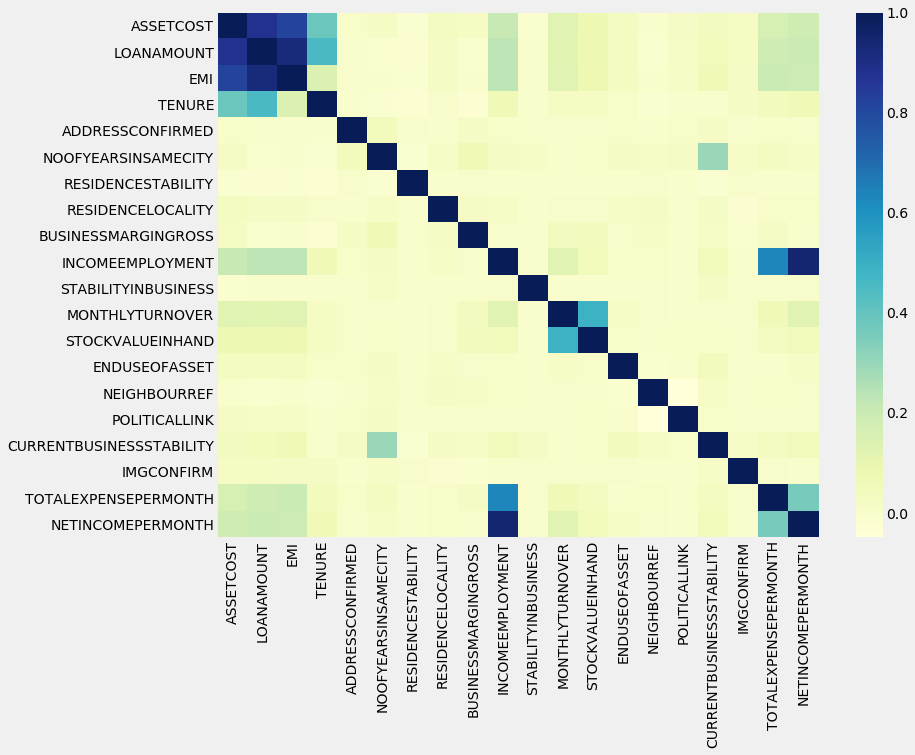

In [118]:
corr = data.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr,cmap="YlGnBu")

In [ ]:
new_data=data

### One Hot Encoding

In [ ]:
y = data.pop('Good_Bad')

In [ ]:
data.info()

In [ ]:
def MINmaxScaler(column):
  column = ((column-column.min())/(column.max()-column.min()))
  return column

In [ ]:
data.ASSETCOST

In [ ]:
data.ASSETCOST = MINmaxScaler(data.ASSETCOST)

In [ ]:
column_list = [ 'LOANAMOUNT', 'EMI', 'TENURE', 'ADDRESSCONFIRMED',
               'NOOFYEARSINSAMECITY', 'RESIDENCESTABILITY','RESIDENCELOCALITY', 'BUSINESSMARGINGROSS','INCOMEEMPLOYMENT', 'STABILITYINBUSINESS', 
  'MONTHLYTURNOVER', 'STOCKVALUEINHAND', 'ENDUSEOFASSET',
       'NEIGHBOURREF', 'POLITICALLINK', 
       'CURRENTBUSINESSSTABILITY', 'IMGCONFIRM',
       'TOTALEXPENSEPERMONTH', 'NETINCOMEPERMONTH']

In [ ]:
# Scaling function to be written.. will write this function lator.
#which will take numeric column and use scaling function from sklearn library. 
for i in column_list:
  print('data.{} = MINmaxScaler(data.{})'.format(i,i))


In [ ]:
data.LOANAMOUNT = MINmaxScaler(data.LOANAMOUNT)
data.EMI = MINmaxScaler(data.EMI)
data.TENURE = MINmaxScaler(data.TENURE)
data.ADDRESSCONFIRMED = MINmaxScaler(data.ADDRESSCONFIRMED)
data.NOOFYEARSINSAMECITY = MINmaxScaler(data.NOOFYEARSINSAMECITY)
data.RESIDENCESTABILITY = MINmaxScaler(data.RESIDENCESTABILITY)
data.RESIDENCELOCALITY = MINmaxScaler(data.RESIDENCELOCALITY)
data.BUSINESSMARGINGROSS = MINmaxScaler(data.BUSINESSMARGINGROSS)
data.INCOMEEMPLOYMENT = MINmaxScaler(data.INCOMEEMPLOYMENT)
data.STABILITYINBUSINESS = MINmaxScaler(data.STABILITYINBUSINESS)
data.MONTHLYTURNOVER = MINmaxScaler(data.MONTHLYTURNOVER)
data.STOCKVALUEINHAND = MINmaxScaler(data.STOCKVALUEINHAND)
data.ENDUSEOFASSET = MINmaxScaler(data.ENDUSEOFASSET)
data.NEIGHBOURREF = MINmaxScaler(data.NEIGHBOURREF)
data.POLITICALLINK = MINmaxScaler(data.POLITICALLINK)
data.CURRENTBUSINESSSTABILITY = MINmaxScaler(data.CURRENTBUSINESSSTABILITY)
data.IMGCONFIRM = MINmaxScaler(data.IMGCONFIRM)
data.TOTALEXPENSEPERMONTH = MINmaxScaler(data.TOTALEXPENSEPERMONTH)
data.NETINCOMEPERMONTH = MINmaxScaler(data.NETINCOMEPERMONTH)

In [ ]:
data

- Ignore  this cell  
assignment_data[assignment_data["CUSTOMER_PROFILE_CODE"] == "PROF311"]
Then, use iterrows to loop over the selected part.

for idx, row in assignment_data[assignment_data["CUSTOMER_PROFILE_CODE"] == "PROF311"].iterrows():
    print(row)

In [ ]:
data= pd.get_dummies(data)

# Classifying data in Train Test using Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(data, y, test_size=0.20, random_state=42)

In [ ]:
X_train

## Predictive Modeling (Using API)

### importing all of Algoriths that we want to use
#### Linear_model: 
<font color=blue>LogisticRegression,
              Perceptron, 
              SGDClassifier, 
              LogisticRegressionCV, 
              PassiveAggressiveClassifier,
              RidgeClassifierCV, Lasso, Ridge
<font color=black>   
    
#### Neighbors:
<font color=red> KNeighborsRegressor, NearestNeighbors, KNeighborsClassifier 
<font color=black>
    
#### Naive Bayes:
<font color=green>BernoulliNB, GaussianNB
<font color=black>
    
#### SVM:
<font color=pink>LinearSVC, SVC
<font color=black>
    
#### Tree:
<font color=blue>DecisionTreeClassifier, DecisionTreeRegressor
<font color=black>
    
#### Neural network:
<font color=red>MLPClassifier, MLPRegressor 
<font color=black>
    
#### Ensemble:
<font color=black>AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier

In [ ]:
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier, LogisticRegressionCV, PassiveAggressiveClassifier, RidgeClassifierCV, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor, NearestNeighbors, KNeighborsClassifier 
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor   
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier

In [ ]:
X_train.info()
print('-'*70)
X_test.info()

## LOOP FOR FITTING AND PREDICTING USING ALL MODEL (API) 

Just like in matlab, i have used many algorithm to find out about algorithm which will give best accuracy

In [64]:
model= [LogisticRegression(), RidgeClassifierCV(), KNeighborsClassifier(), SVC() , DecisionTreeClassifier()]
name = ['LogisticRegression','RidgeClassifierCV','KNeighborsClassifier', 'SVC','DecisionTreeClassifier',]
SCORE= []
TESTING=[]
for API in model:
    #ku will be replaced with each model like as first one is LogisticRegression()
    algorithm = API.fit(X_train,Y_train)
    print(API)
    #now 'algorithm' will be fitted by API with above line and next line will check score with data training and testing
    print('training set accuracy: {:.2f}'.format(algorithm.score(X_train,Y_train)))
    print('test set accuracy: {:.2f}'.format(algorithm.score(X_test,Y_test)))
    print('---'*20)
    #Now we are making a dataframe where by each loop the dataframe is added by SCORE,TESTING
    SCORE.append(algorithm.score(X_train,Y_train))
    TESTING.append(algorithm.score(X_test,Y_test))
models_dataframe=pd.DataFrame({'training score':SCORE,'testing score':TESTING},index=name)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
training set accuracy: 0.83
test set accuracy: 0.64
------------------------------------------------------------
RidgeClassifierCV(alphas=array([ 0.1,  1. , 10. ]), class_weight=None, cv=None,
                  fit_intercept=True, normalize=False, scoring=None,
                  store_cv_values=False)
training set accuracy: 0.77
test set accuracy: 0.65
------------------------------------------------------------
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
training set accuracy: 0.74
test set accuracy: 0.61
--------------------

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
training set accuracy: 0.68
test set accuracy: 0.68
------------------------------------------------------------
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
training set accuracy: 1.00
test set accuracy: 0.58
------------------------------------------------------------


### Checking the Accuracy of Models

In [65]:
models_dataframe

,training score,testing score
LogisticRegression,0.828480,0.640798
RidgeClassifierCV,0.771492,0.651330
KNeighborsClassifier,0.738769,0.608647
SVC,0.677898,0.676275
DecisionTreeClassifier,1.000000,0.577605


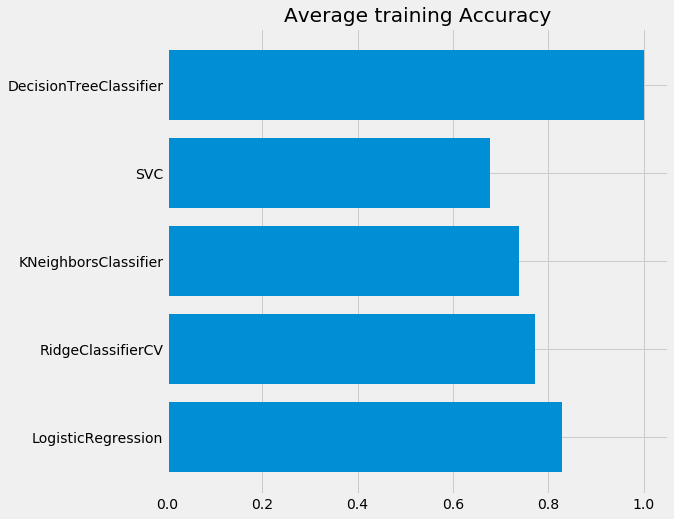

In [66]:
models_dataframe['training score'].plot.barh(width=0.8)
plt.title('Average training Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.show()

#### MODEL COMPARISON
SEEING IN DESCENDING ORDER FOR EASIER COMPARISON

In [67]:
asendingtraining = models_dataframe.sort_values(by='training score', ascending=False)
asendingtraining 

,training score,testing score
DecisionTreeClassifier,1.000000,0.577605
LogisticRegression,0.828480,0.640798
RidgeClassifierCV,0.771492,0.651330
KNeighborsClassifier,0.738769,0.608647
SVC,0.677898,0.676275


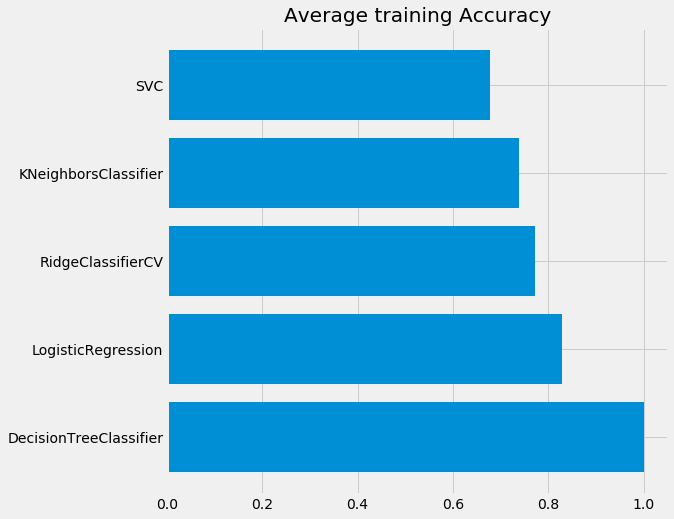

In [68]:
asendingtraining['training score'].plot.barh(width=0.8)
plt.title('Average training Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.show()

In [69]:
ascendingtesting= models_dataframe.sort_values(by='testing score', ascending=True)
ascendingtesting

,training score,testing score
DecisionTreeClassifier,1.000000,0.577605
KNeighborsClassifier,0.738769,0.608647
LogisticRegression,0.828480,0.640798
RidgeClassifierCV,0.771492,0.651330
SVC,0.677898,0.676275


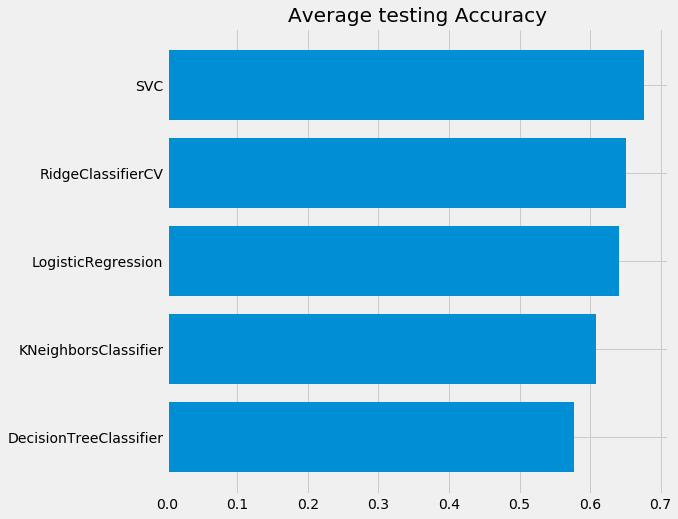

In [70]:
ascendingtesting['testing score'].plot.barh(width=0.8)
plt.title('Average testing Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.show()